We can use logistic regression in the cases where it does not make sense to use multiple regression

In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
from plotnine import *

We can use logistic regression when the dependent variable can only have 2 values (0 or 1).

https://en.wikipedia.org/wiki/Logistic_regression#Probability_of_passing_an_exam_versus_hours_of_study

In this example we will take a group of students.

The independent variable (hours) that the student has taken during a course

The dependent variable (passed) will show if the student has passed(1) or failed(0)

In [2]:
# Creating our dataframe
hours = [
    0.5, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 
    2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50,  
    4.00, 4.25, 4.50, 4.75, 5.00, 5.50
]

passed = [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]

students = pd.DataFrame({'hours' : hours, 'passed': passed})
students.sample(5)

,hours,passed
13,3.50,0
4,1.50,0
19,5.50,1
12,3.25,1
8,2.25,1


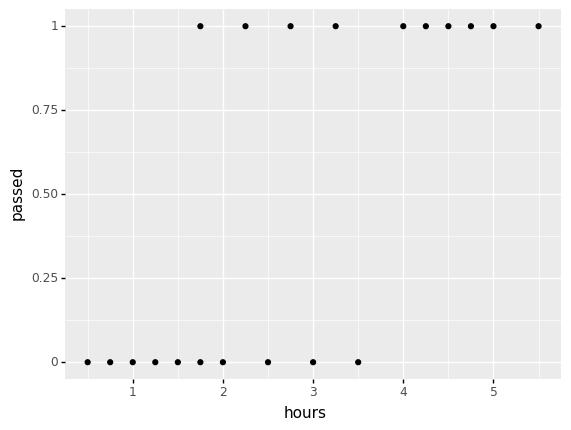

<ggplot: (126050657750)>

In [3]:
# Creating a diagram
ggplot(data=students) + geom_point(aes(x='hours', y='passed'))

It is obvious that we cannot use linear regression

In [6]:
# Lets check the summary to verify that

students_mod = smf.ols("passed ~ hours", data=students)
students_res = students_mod.fit()
students_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 passed   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     16.29
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           0.000775
Time:                        19:28:28   Log-Likelihood:                -8.0712
No. Observations:                  20   AIC:                             20.14
Df Residuals:                      18   BIC:                             22.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1539      0.183     -0.840      0.412      -0.539       0.231
hours          0.2346      0.058      4.036      0.001       0.112       0.357
==============================================================================
Omnibus:                        0.367   Durbin-Watson:                   3.416
Prob(Omnibus):                  0.832   Jarque-Bera (JB):                0.381
Skew:                           0.270   Prob(JB):                        0.827
Kurtosis:                       2.594   Cond. No.                         7.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R^2 = 0.475 its okay

p-value = 0.412 which is high enough

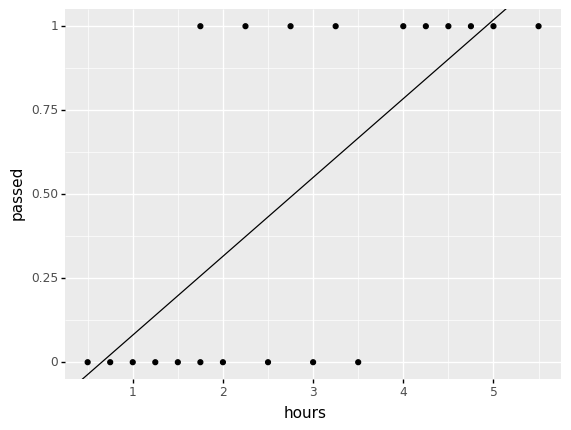

<ggplot: (126050639478)>

In [7]:
# Lets create a diagrom regarding passed variable
ggplot(data=students) +\
    geom_point(aes(x='hours', y='passed')) +\
    geom_abline(intercept=students_res.params['Intercept'],
               slope=students_res.params['hours'])

We can easily see that the regression line just cuts thought the middle of the graph rather that trying to contain as many points as it can on a linear line

For example we can see that the student who studied 3 hours has passed 0.5 - it does not make any sense

In order to solve this issue instead of taking the value passed we will take the probability of the student passing 

Where x is the number of hours

p(x)/1−p(x) ==> odd-ratio

Hence we use logistic transformation
logit(p(x))= lnp(x) / 1−p(x)

2 values
1) y=α+βx

2) y=lnp(x) / 1−p(x)

logit(p(x))=lnp(x)/1−p(x)=α+βx

Why do we need to do that:

If we solve the above equation for p(x)

p(x)=1/1+e−(α+βx)

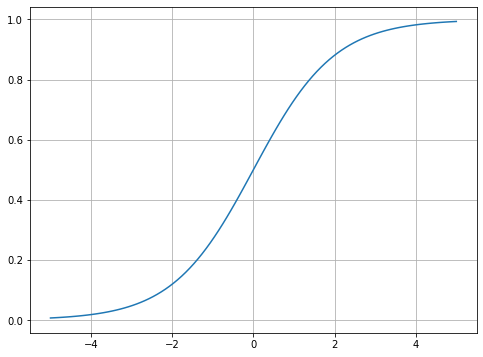

In [8]:
# Plotting the last equation:

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
x = np.linspace(-5, 5,100)
y = 1 / (1 + np.exp(-x))
ax.plot(x, y)
ax.grid(True)

We can see an S figure

In [10]:
# Using statmodels and the function logit() - logistic regression
from statsmodels.formula.api import logit
students_logit_mod = logit("passed ~ hours", data=students)
students_logit_res = students_logit_mod.fit()

students_logit_res.summary()

Optimization terminated successfully.
         Current function value: 0.401494
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 passed   No. Observations:                   20
Model:                          Logit   Df Residuals:                       18
Method:                           MLE   Df Model:                            1
Date:                Thu, 31 Mar 2022   Pseudo R-squ.:                  0.4208
Time:                        20:26:41   Log-Likelihood:                -8.0299
converged:                       True   LL-Null:                       -13.863
Covariance Type:            nonrobust   LLR p-value:                 0.0006365
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.0777      1.761     -2.316      0.021      -7.529      -0.626
hours          1.5046      0.629      2.393      0.017       0.272       2.737
==============================================================================
"""

This table is different that the previous tables from regression because logic regression operates differently

In [11]:
# Getting the predicted values
passed_predicted = students_logit_res.predict(students['hours'])
passed_predicted

0     0.034710
1     0.049773
2     0.070892
3     0.100029
4     0.139344
5     0.190837
6     0.190837
7     0.255703
8     0.333530
9     0.421627
10    0.515011
11    0.607359
12    0.692617
13    0.766481
14    0.874448
15    0.910278
16    0.936624
17    0.955611
18    0.969097
19    0.985194
dtype: float64

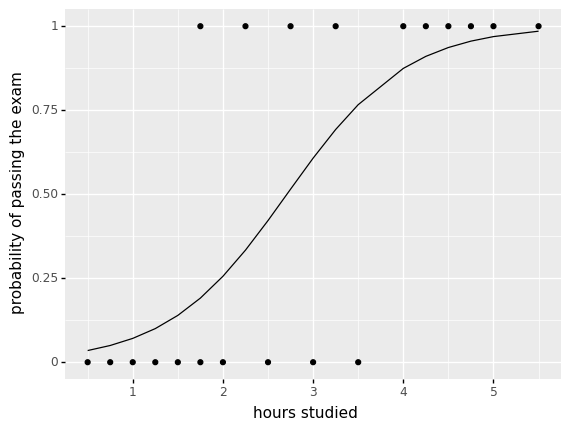

<ggplot: (126051658680)>

In [12]:
# Plotting a graph
ggplot(data=students) +\
    geom_point(aes(x='hours', y='passed')) +\
    geom_line(aes(x='hours'), y=passed_predicted) +\
    labs(y='probability of passing the exam', x='hours studied')

We can see that we get a more suitable model.

Also on the vertical axis we have the probability of passing!

hence the data do make sense ( eg at 3 hours you have appr 0.625 passing)

In [13]:
# Summary of the results
students_logit_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 passed   No. Observations:                   20
Model:                          Logit   Df Residuals:                       18
Method:                           MLE   Df Model:                            1
Date:                Thu, 31 Mar 2022   Pseudo R-squ.:                  0.4208
Time:                        20:29:30   Log-Likelihood:                -8.0299
converged:                       True   LL-Null:                       -13.863
Covariance Type:            nonrobust   LLR p-value:                 0.0006365
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.0777      1.761     -2.316      0.021      -7.529      -0.626
hours          1.5046      0.629      2.393      0.017       0.272       2.737
==============================================================================
"""

Logistic regression does not operate the same way as linear regression by using the method of least squares , but it uses maximum likelihood

Hence we can see that in the place of R^2 we have a pseudo-R^2 called McFadden pseudo R^2

This pseudo-R^2 can have lower limit that normal R^2 from 0.2 -0.4 can fit a very good model

The  Log-Likelihood, LL-Null, LLR p-value are useful for the model

The result show that the success correlates with studying

ln [p(x)][1−p(x)]=−4,0777+1,5046x

[p(x)][1−p(x)]=exp(−4,0777+1,5046x)=e(−4,0777+1,5046x)

Hence 1 more hour of studying multiples the probability of success increases e^1,5046≈4,5.

No studying

e^−4,0777≈0,017=1,7%.

Solving for p(x)

p(x)=1 / 1+e(4,0777−1,5046x)

Seems like that more hours you study the better

In [14]:
study_hours = np.arange(1, 6)
intercept = students_logit_res.params['Intercept']
hours_coeff = students_logit_res.params['hours']
probability_passing = 1 / (1 + np.exp(-(intercept + hours_coeff*study_hours)))
print('study hours', study_hours)
print('probability of passing', probability_passing)

study hours [1 2 3 4 5]
probability of passing [0.07089196 0.25570318 0.60735865 0.8744475  0.96909707]


If we have more than one independent variable we can also use multiple logistic regression

Taking another set of data ( USA 1974 regarding Extramarital Affairs ) for females

In [15]:
print(sm.datasets.fair.SOURCE)


Fair, Ray. 1978. "A Theory of Extramarital Affairs," `Journal of Political
Economy`, February, 45-61.

The data is available at http://fairmodel.econ.yale.edu/rayfair/pdf/2011b.htm



In [16]:
print(sm.datasets.fair.NOTE[8:]) # get rid of empty lines

Number of observations: 6366
    Number of variables: 9
    Variable name definitions:

        rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                        4 = good, 5 = very good
        age             : Age
        yrs_married     : No. years married. Interval approximations. See
                        original paper for detailed explanation.
        children        : No. children
        religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                        4 = strongly
        educ            : Level of education, 9 = grade school, 12 = high
                        school, 14 = some college, 16 = college graduate,
                        17 = some graduate school, 20 = advanced degree
        occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                        or unskilled worker; 3 = white-colloar; 4 = teacher
                        counselor social worker, nurse; artist, writers;
                  

In [17]:
#set affair as either 0 or 1

affair_df = sm.datasets.fair.load_pandas().data

affair_df['affair'] = (affair_df['affairs'] > 0).astype(float)
affair_df.sort_values(by='affair', inplace=True)
affair_df.reset_index(inplace=True, drop=True)
affair_df.sample(10)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
4102,4.0,27.0,6.0,1.0,1.0,20.0,4.0,4.0,0.000000,0.0
4162,3.0,22.0,0.5,0.0,2.0,17.0,3.0,5.0,0.000000,0.0
4935,1.0,42.0,23.0,2.0,3.0,12.0,3.0,5.0,0.521739,1.0
625,5.0,22.0,2.5,0.0,2.0,14.0,2.0,2.0,0.000000,0.0
957,4.0,22.0,2.5,0.0,1.0,12.0,4.0,3.0,0.000000,0.0
1651,3.0,22.0,2.5,1.0,1.0,12.0,3.0,4.0,0.000000,0.0
5179,5.0,22.0,6.0,2.0,3.0,14.0,2.0,4.0,0.583333,1.0
2921,5.0,27.0,6.0,1.0,2.0,12.0,5.0,5.0,0.000000,0.0
1125,4.0,22.0,2.5,1.0,3.0,14.0,4.0,5.0,0.000000,0.0
5862,4.0,27.0,13.0,2.0,3.0,14.0,5.0,5.0,0.942308,1.0


In [19]:
# Lets get a general probability of having an affair

affair_df['affair'].sum() / affair_df['affair'].count()

0.3224945020420987

Lets use logistic regression to go deeper to find out what variable affect this

In [20]:
affair_mod = logit("affair ~ occupation + educ + occupation_husb"
                   " + rate_marriage + age + yrs_married + children"
                   " + religious", affair_df).fit()

affair_mod.summary()

Optimization terminated successfully.
         Current function value: 0.545314
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 affair   No. Observations:                 6366
Model:                          Logit   Df Residuals:                     6357
Method:                           MLE   Df Model:                            8
Date:                Thu, 31 Mar 2022   Pseudo R-squ.:                  0.1327
Time:                        20:40:35   Log-Likelihood:                -3471.5
converged:                       True   LL-Null:                       -4002.5
Covariance Type:            nonrobust   LLR p-value:                5.807e-224
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.7257      0.299     12.470      0.000       3.140       4.311
occupation          0.1602      0.034      4.717      0.000       0.094       0.227
educ               -0.0392      0.015     -2.533      0.011      -0.070      -0.009
occupation_husb     0.0124      0.023      0.541      0.589      -0.033       0.057
rate_marriage      -0.7161      0.031    -22.784      0.000      -0.778      -0.655
age                -0.0605      0.010     -5.885      0.000      -0.081      -0.040
yrs_married         0.1100      0.011     10.054      0.000       0.089       0.131
children           -0.0042      0.032     -0.134      0.893      -0.066       0.058
religious          -0.3752      0.035    -10.792      0.000      -0.443      -0.307
===================================================================================
"""

In [21]:
# Lets take occupation
affair_mod.params['occupation']

0.1602338331908284

Since logarithmic then the p(x) = e^0,1602≈1,1737 == 17%

The better the female partner occupation the more likely to have an affair

In [22]:
# another variable
affair_mod.params['yrs_married']

0.11001794098252722

Since logarithmic then the p(x) =  e^0,11≈1,12 == 12%

In [23]:
affair_mod.params['rate_marriage']

-0.7161071050802287

Since logarithmic then the p(x) = e^ −0,7161≈0,4886, getting less by 100−0,4886≈51%.

In [24]:
affair_mod.params['religious']

-0.37515765268395346

e^−0,3752≈0,6872 ==> 100−68,72≈31%.

Note:

To get a more information regarding logistic regression

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3936971/